In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('erp_order_data.xlsx')
print(df.head())

   id internal_order_number online_order_number store_name  \
0   1      IO20251023000001   ON125347071883677    时代服饰旗舰店   
1   2      IO20251023000002   ON677812434302673    时代服饰旗舰店   
2   3      IO20251023000003   ON475820950373242    都市风尚官方店   
3   4      IO20251023000004   ON517267520467920    时尚潮流旗舰店   
4   5      IO20251023000005   ON262099757832742    时尚潮流旗舰店   

  full_channel_user_id           shipping_date            payment_date  \
0            U00000109 2024-12-14 04:37:51.572 2024-12-13 04:37:51.572   
1            U00000072 2025-07-09 08:35:17.042 2025-07-06 08:35:17.042   
2            U00000012 2025-02-25 05:00:55.199 2025-02-23 05:00:55.199   
3            U00000170 2025-02-10 08:35:19.627 2025-02-07 08:35:19.627   
4            U00000156 2025-06-15 10:06:56.187 2025-06-12 10:06:56.187   

   payable_amount  paid_amount status  ... unit_price product_name  \
0          525.78       525.78    已完成  ...     257.89        修身牛仔裤   
1          157.10       157.10    已完成  ...

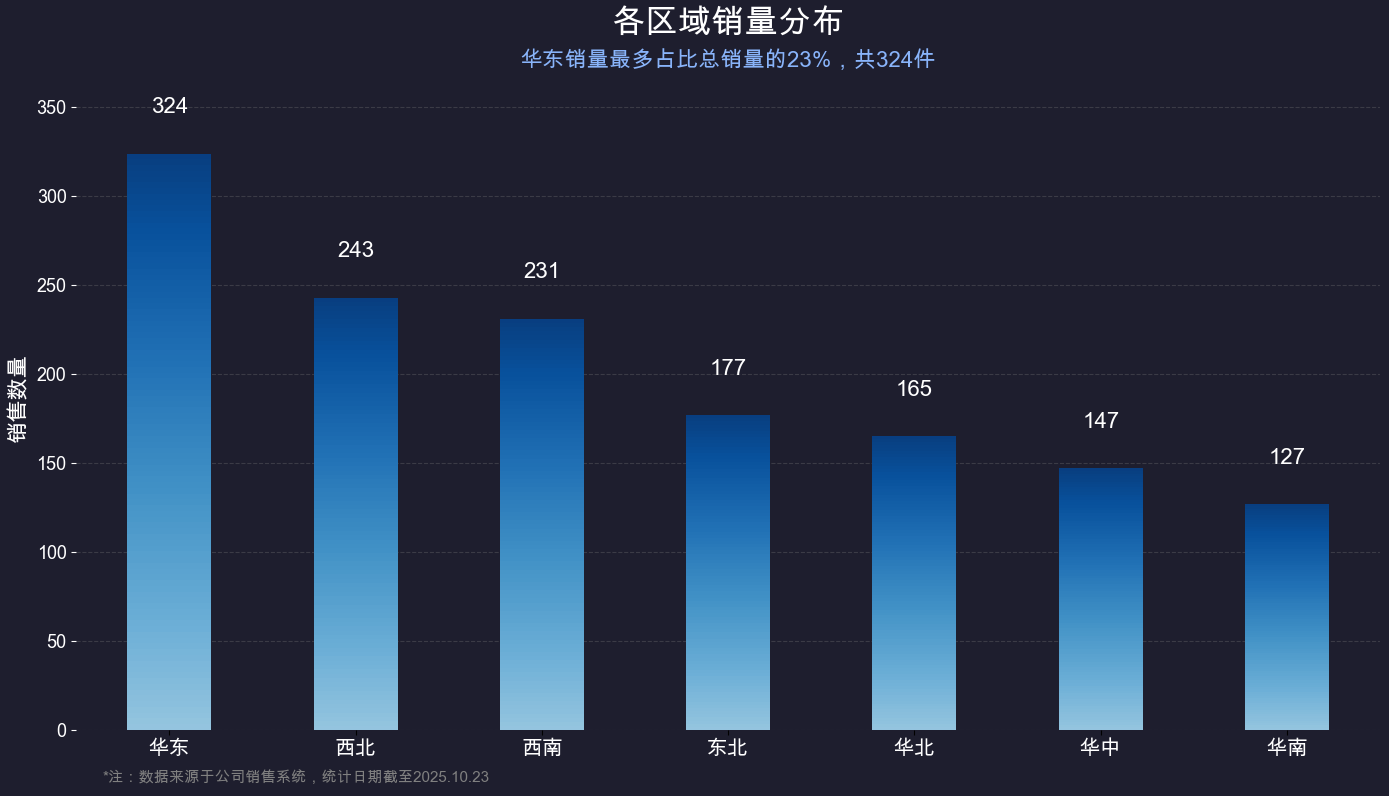


各区域销量统计：
region  total_quantity  order_count
    华东             324          178
    西北             243          152
    西南             231          128
    东北             177          109
    华北             165           94
    华中             147           94
    华南             127           75

总销量：1414 件
订单总数：1000 单


In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'STHeiti']
plt.rcParams['axes.unicode_minus'] = False

# 定义区域映射（根据中国地理区域划分）
region_mapping = {
    '北京': '华北', '天津': '华北', '河北省': '华北', '山西省': '华北', '内蒙古自治区': '华北',
    '辽宁省': '东北', '吉林省': '东北', '黑龙江省': '东北',
    '上海': '华东', '江苏省': '华东', '浙江省': '华东', '安徽省': '华东', '福建省': '华东', 
    '江西省': '华东', '山东省': '华东',
    '河南省': '华中', '湖北省': '华中', '湖南省': '华中',
    '广东省': '华南', '广西壮族自治区': '华南', '海南省': '华南',
    '重庆': '西南', '四川省': '西南', '贵州省': '西南', '云南省': '西南', '西藏自治区': '西南',
    '陕西省': '西北', '甘肃省': '西北', '青海省': '西北', '宁夏回族自治区': '西北', '新疆维吾尔自治区': '西北'
}

# 添加区域列
df['region'] = df['province'].map(region_mapping)

# 按区域统计订单数量
region_stats = df.groupby('region').agg({
    'quantity': 'sum',
    'id': 'count'
}).reset_index()
region_stats.columns = ['region', 'total_quantity', 'order_count']

# 按总数量排序
region_stats = region_stats.sort_values('total_quantity', ascending=False)

# 创建图表
fig, ax = plt.subplots(figsize=(14, 8))

# 设置深色背景
fig.patch.set_facecolor('#1e1e2e')
ax.set_facecolor('#1e1e2e')

# 获取数据
regions = region_stats['region'].tolist()
quantities = region_stats['total_quantity'].tolist()

# 绘制渐变柱形图
bar_width = 0.45  # 缩小柱子宽度
gradient_steps = 100  # 渐变层数

# 获取colormap
cmap = mpl.colormaps.get_cmap('Blues')

for i, (region, qty) in enumerate(zip(regions, quantities)):
    # 为每个柱子创建从下到上的渐变效果
    for j in range(gradient_steps):
        # 计算每一层的高度和位置
        layer_height = qty / gradient_steps
        y_position = j * layer_height
        
        # 从0.4到0.95的渐变（从浅蓝到深蓝）
        color_value = 0.4 + (j / gradient_steps) * 0.55
        color = cmap(color_value)
        
        # 绘制每一层的矩形（无边框）
        rect = Rectangle((i - bar_width/2, y_position), bar_width, layer_height,
                         facecolor=color, edgecolor='none')
        ax.add_patch(rect)
    
    # 在柱子上添加数值标签
    ax.text(i, qty + 20, f'{int(qty)}',
            ha='center', va='bottom', fontsize=16, fontweight='bold', color='white')

# 设置x轴
ax.set_xticks(range(len(regions)))
ax.set_xticklabels(regions, fontsize=15, color='white')
ax.set_xlim(-0.5, len(regions) - 0.5)

# 设置y轴
ax.set_ylim(0, max(quantities) * 1.15)
ax.set_ylabel('销售数量', fontsize=16, fontweight='bold', color='white')
ax.tick_params(axis='y', colors='white', labelsize=13)

# 设置网格线（仅保留横向虚线）
ax.grid(axis='y', linestyle='--', alpha=0.3, color='gray', zorder=0)
ax.set_axisbelow(True)

# 隐藏所有边框
for spine in ax.spines.values():
    spine.set_visible(False)

# 添加标题和注释
total_qty = region_stats['total_quantity'].sum()
max_region = region_stats.iloc[0]
percentage = (max_region['total_quantity'] / total_qty * 100)

title_text = f'各区域销量分布'
subtitle_text = f'{max_region["region"]}销量最多占比总销量的{percentage:.0f}%，共{int(max_region["total_quantity"])}件'

ax.text(0.5, 1.05, title_text, 
        transform=ax.transAxes, fontsize=24, fontweight='bold', 
        ha='center', color='white')
ax.text(0.5, 1.00, subtitle_text,
        transform=ax.transAxes, fontsize=16,
        ha='center', color='#89b4fa')

# 添加数据来源注释
ax.text(0.02, -0.08, '*注：数据来源于公司销售系统，统计日期截至2025.10.23',
        transform=ax.transAxes, fontsize=11, color='gray', style='italic')

plt.tight_layout()
plt.show()

print(f"\n各区域销量统计：")
print(region_stats.to_string(index=False))
print(f"\n总销量：{total_qty} 件")
print(f"订单总数：{df['id'].nunique()} 单")

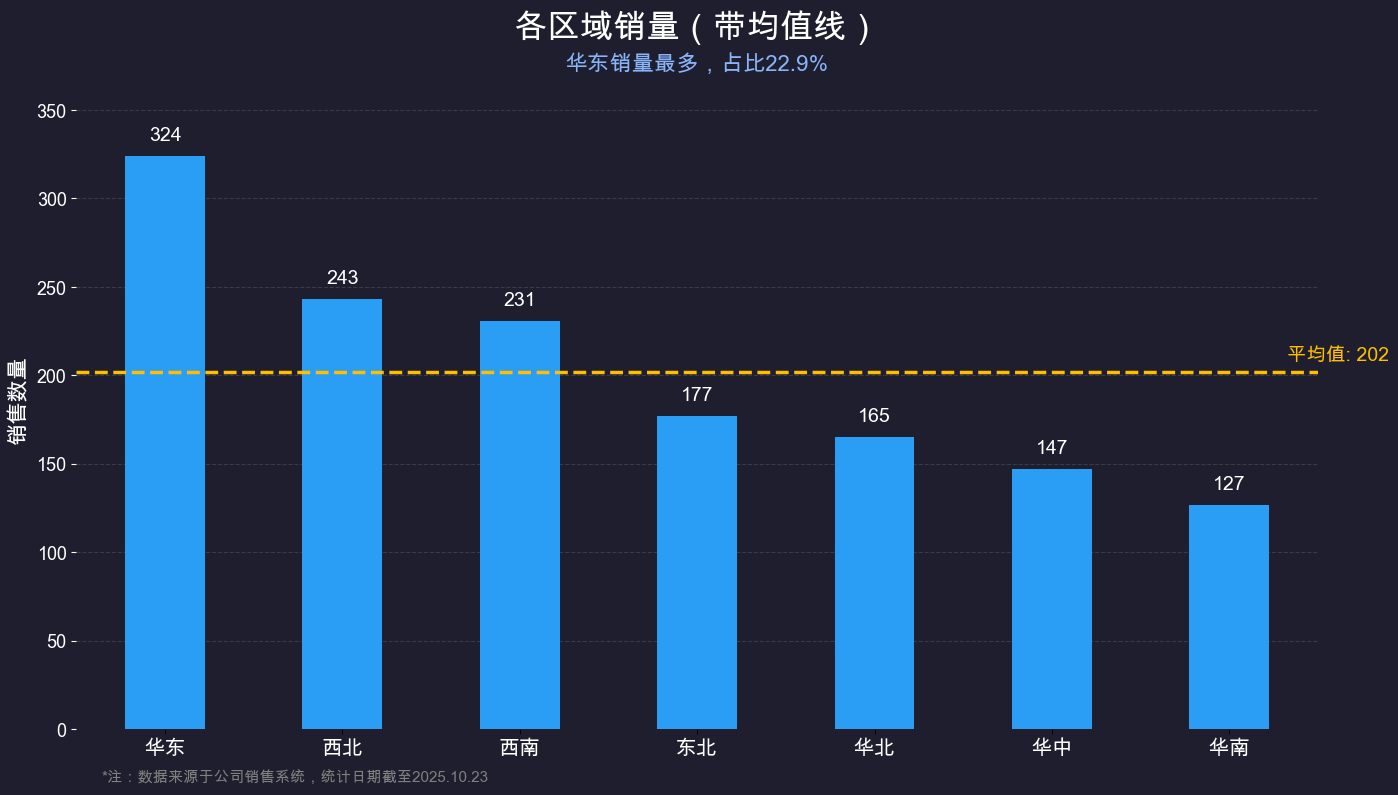


各区域销量统计：
region  total_quantity  order_count
    华东             324          178
    西北             243          152
    西南             231          128
    东北             177          109
    华北             165           94
    华中             147           94
    华南             127           75

平均销量: 202.00 件


In [7]:
# 可复用单元：绘制区域销量柱状图并标注均值（假设 cell 3 已计算并存在 region_stats）
import matplotlib.pyplot as plt
import numpy as np

def plot_region_bar_with_mean(region_stats, figsize=(12,6), bar_color='#2a9df4'):
    """绘制按区域的柱状图并标注均值线。
    输入：region_stats DataFrame (columns: region, total_quantity, order_count)
    """
    regions = region_stats['region'].tolist()
    quantities = region_stats['total_quantity'].tolist()
    x = np.arange(len(regions))

    fig, ax = plt.subplots(figsize=figsize)
    fig.patch.set_facecolor('#1e1e2e')
    ax.set_facecolor('#1e1e2e')

    # 柱状图
    bars = ax.bar(x, quantities, color=bar_color, width=0.45, zorder=3)

    # 在柱子上显示数值标签
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, h + max(quantities) * 0.02,
                f'{int(h)}', ha='center', va='bottom', fontsize=14, color='white', fontweight='bold')

    # 平均值线
    mean_val = np.mean(quantities)
    ax.axhline(mean_val, color='#ffbf00', linestyle='--', linewidth=2.5, zorder=4)
    ax.text(len(regions) - 0.1, mean_val + max(quantities) * 0.02,
            f'平均值: {mean_val:.0f}', color='#ffbf00', fontsize=14, fontweight='bold', ha='right')

    # 坐标轴和样式
    ax.set_xticks(x)
    ax.set_xticklabels(regions, fontsize=15, color='white')
    ax.set_xlim(-0.5, len(regions) - 0.5)
    ax.set_ylim(0, max(quantities) * 1.15)
    ax.set_ylabel('销售数量', fontsize=16, fontweight='bold', color='white')
    ax.tick_params(axis='y', colors='white', labelsize=13)

    # 仅保留横向虚线网格
    ax.grid(axis='y', linestyle='--', alpha=0.3, color='gray', zorder=0)
    ax.set_axisbelow(True)

    # 隐藏外框
    for spine in ax.spines.values():
        spine.set_visible(False)

    # 标题与副标题
    title_text = '各区域销量（带均值线）'
    subtitle_text = f'{region_stats.iloc[0]["region"]}销量最多，占比{region_stats.iloc[0]["total_quantity"] / region_stats["total_quantity"].sum() * 100:.1f}%'
    ax.text(0.5, 1.05, title_text, transform=ax.transAxes, fontsize=24, fontweight='bold', ha='center', color='white')
    ax.text(0.5, 1.00, subtitle_text, transform=ax.transAxes, fontsize=16, ha='center', color='#89b4fa')

    # 注释
    ax.text(0.02, -0.08, '*注：数据来源于公司销售系统，统计日期截至2025.10.23', transform=ax.transAxes, fontsize=11, color='gray', style='italic')

    plt.tight_layout()
    plt.show()

    # 返回均值以便后续使用
    return mean_val

mean_value = plot_region_bar_with_mean(region_stats, figsize=(14,8))
print('\n各区域销量统计：')
print(region_stats.to_string(index=False))
print(f'\n平均销量: {mean_value:.2f} 件')


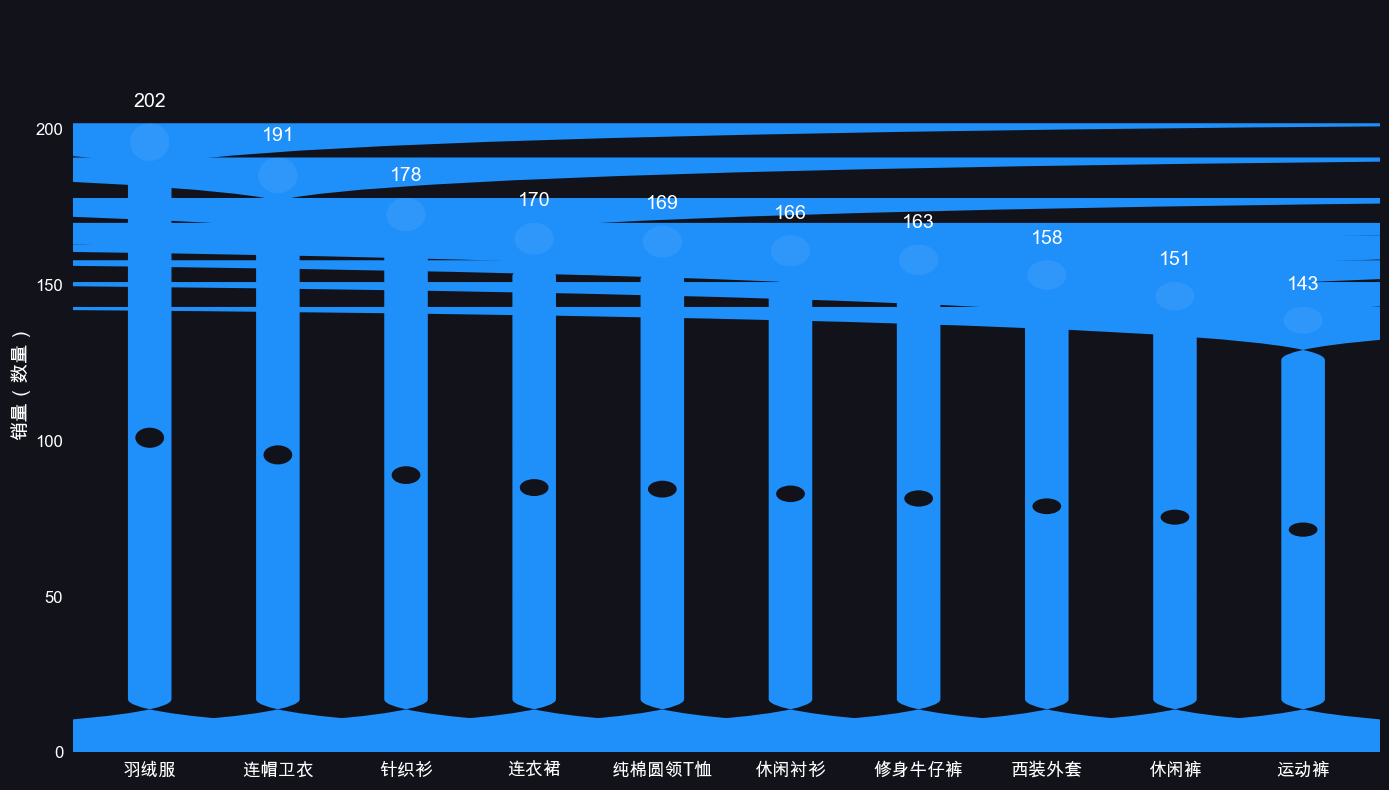


商品销量统计（Top）：
product_name  quantity
         羽绒服       202
        连帽卫衣       191
         针织衫       178
         连衣裙       170
      纯棉圆领T恤       169
        休闲衬衫       166
       修身牛仔裤       163
        西装外套       158
         休闲裤       151
         运动裤       143


In [36]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, Ellipse
import matplotlib as mpl
import numpy as np

# 按商品名称统计销量并取Top10
product_stats = df.groupby('product_name', as_index=False)['quantity'].sum()
product_stats = product_stats.sort_values('quantity', ascending=False).head(10)

names = product_stats['product_name'].tolist()
values = product_stats['quantity'].tolist()

# 画布与样式
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'STHeiti']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(14, 8))
bg_color = '#11121a'
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# 直接计算条形位置
x = np.arange(len(names))
bar_width = 0.34
max_val = max(values)

# 清除旧的 patches
for p in list(ax.patches):
    try:
        p.remove()
    except Exception:
        pass

# 主色（单色更稳健），同时在顶部用半透明白色模拟高光
main_rgb = (0.12, 0.56, 0.98, 1.0)

for i, (name, h) in enumerate(zip(names, values)):
    left = i - bar_width / 2
    w = bar_width
    y = 0

    rounding_size = max(6, min(w * 50, h * 0.12))
    boxstyle = f'round,pad=0,rounding_size={rounding_size}'

    # 绘制圆角实心条（保证可见）
    bar = FancyBboxPatch((left, y), w, h, boxstyle=boxstyle, linewidth=0, facecolor=main_rgb, zorder=5, antialiased=True)
    ax.add_patch(bar)

    # 顶部高光（小椭圆）
    cap_height = max(2, h * 0.06)
    cap = Ellipse((left + w / 2, y + h - cap_height/2), width=w * 0.9, height=cap_height,
                  angle=0, facecolor=(1,1,1,0.08), edgecolor='none', linewidth=0, zorder=6)
    ax.add_patch(cap)

    # 收腰（与背景同色的细椭圆），位置靠中间
    center_x = left + w / 2
    center_y = y + h * 0.50
    ellipse_width = w * 0.66
    ellipse_height = max(1, h * 0.032)
    waist = Ellipse((center_x, center_y), width=ellipse_width, height=ellipse_height,
                    angle=0, facecolor=bg_color, edgecolor='none', linewidth=0, zorder=7)
    ax.add_patch(waist)

    # 顶部数值标签
    ax.text(left + w / 2, h + max_val * 0.02, f'{int(h)}', ha='center', va='bottom', fontsize=14, color='white', fontweight='bold', zorder=10)

# 坐标轴设置
ax.set_xticks(x)
ax.set_xticklabels(names, fontsize=13, color='white')
ax.set_xlim(-0.6, len(names) - 0.4)
ax.set_ylim(0, max_val * 1.18)
ax.set_ylabel('销量（数量）', fontsize=14, color='white')
ax.tick_params(axis='y', colors='white', labelsize=12)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='#2b2b36', alpha=0.12, zorder=0)

plt.tight_layout()
plt.show()

print('\n商品销量统计（Top）：')
print(product_stats.to_string(index=False))